In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

sns.set()
%matplotlib inline

# Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. 

### For each question, explain why you chose the approach you did.

In this dataset, the same participants answered questions in 2012 and again 2014.

[Here's the codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html).

In [2]:
df = pd.read_csv('ESSdata_Thinkful.txt')

In [3]:
df

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,SE,3729.0,7,3.0,4.0,5.0,3.0,6.0,6.0,2.0,1.0,18.0,2.0
8590,SE,3732.0,7,5.0,6.0,4.0,4.0,10.0,6.0,3.0,1.0,15.0,2.0
8591,SE,3743.0,7,4.0,5.0,7.0,6.0,8.0,6.0,3.0,1.0,44.0,2.0
8592,SE,3744.0,7,5.0,8.0,8.0,6.0,9.0,7.0,3.0,1.0,15.0,2.0


In [4]:
df.describe(include='all')

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8594,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,NaN,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,NaN,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,NaN,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,NaN,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,NaN,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000


### Some observations before we begin

All of the questions have at least a few null values. We'll have to keep this in mind as we answer each question, and remove rows with null values in the variables we care about.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


The codebook lists a lot more countries than are present in the dataset. This list of countries will be super useful throughout our work:

In [6]:
countries = df['cntry'].unique()
countries

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

The number of respondents per country varies:

In [7]:
df[['cntry','idno']].groupby('cntry').count()

,idno
cntry,
CH,1546
CZ,1316
DE,28
ES,2426
NO,1462
SE,1816


The values for idno are not unique; they must be paired with country to uniquely identify a survey respondent. Here you can see some values for idno appear to up 8 times in the dataset:

In [8]:
df['idno'].value_counts()

1247.0     8
2102.0     8
2077.0     8
1448.0     8
1418.0     8
          ..
2894.0     2
3034.0     2
1788.0     2
7458.0     2
15630.0    2
Name: idno, Length: 3086, dtype: int64

But within each country, each idno only appears twice (once for each of the two survey years):

In [9]:
# Get the number of unique pairings of country+idno.
# This should be 2--one respondent per country, for each survey year.
# If set() returns numbers other than 2, then I am wrong. :)
for country in countries:
    print("{}: {}".format(country,set(df.loc[df['cntry'] == country,'idno'].value_counts().values)))

CH: {2}
CZ: {2}
DE: {2}
ES: {2}
NO: {2}
SE: {2}


The number of men and the number of women who responded to these surveys are not equal!

In [10]:
df['gndr'].value_counts()

1.0    4316
2.0    4268
Name: gndr, dtype: int64

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

I was tempted to simply take the mean of ppltrst per country+year, but was concerned that respondents who experienced giant mood swings between surveys may skew the results. We can identify unique responders, so let's check at that level and aggregate.

### Approach 1:
* For a given country+idno, subtract the higher-year value for ppltrst from the lower-year value. Classify as "yes" (<0 / less trusting) or "no" (>=0 / more, or _no less_, trusting).
* Aggregate yes/no responses per country.

### Approach 2:

Start with the work above, but create a distribution out of the differences between the two survey years. This way we're measuring each person's change in trust, beyond whether it is simply positive or negative.

I expect these distributions will prove to be normal, with the means close to (but probably either slightly higher or lower than!) zero.

A mean of < 0 indicates that people did in fact become less trusting. A mean >= 0 says they either became more trusting, or became no less trusting than they were.

For country: CH


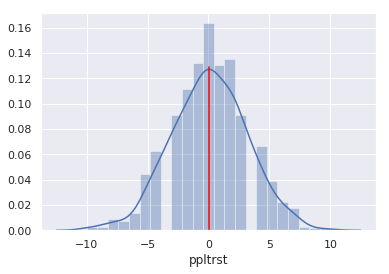

(Approach 1) Count of no less trusting (0) vs. less trusting (1):
0    452
1    321
Name: less_trusting, dtype: int64
(Approach 2) Mean of differences for CH: 0.07373868046571798

(Approach 1) People in CH did not become less trusting between the two survey years
(Approach 2) People in CH did not become less trusting between the two survey years

For country: CZ


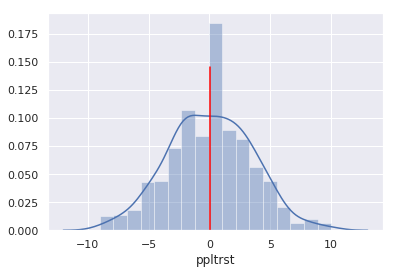

(Approach 1) Count of no less trusting (0) vs. less trusting (1):
0    363
1    287
Name: less_trusting, dtype: int64
(Approach 2) Mean of differences for CZ: 0.06769230769230769

(Approach 1) People in CZ did not become less trusting between the two survey years
(Approach 2) People in CZ did not become less trusting between the two survey years

For country: DE


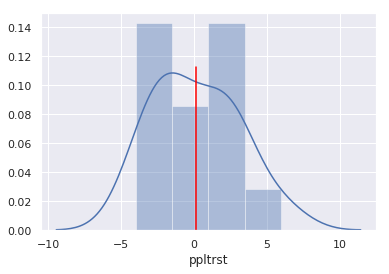

(Approach 1) Count of no less trusting (0) vs. less trusting (1):
1    7
0    7
Name: less_trusting, dtype: int64
(Approach 2) Mean of differences for DE: 0.14285714285714285

(Approach 1) People in DE did not become less trusting between the two survey years
(Approach 2) People in DE did not become less trusting between the two survey years

For country: ES


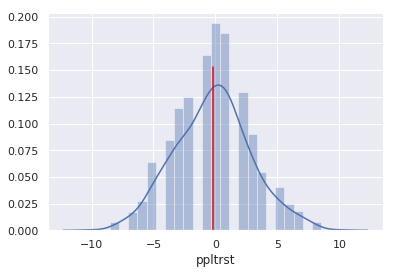

(Approach 1) Count of no less trusting (0) vs. less trusting (1):
0    668
1    543
Name: less_trusting, dtype: int64
(Approach 2) Mean of differences for ES: -0.2171758876961189

(Approach 1) People in ES did not become less trusting between the two survey years
(Approach 2) People in ES became less trusting between the two survey years

For country: NO


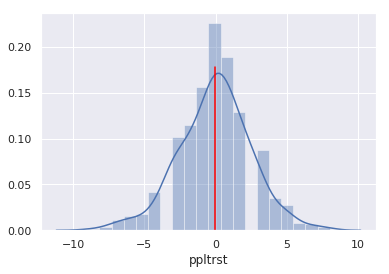

(Approach 1) Count of no less trusting (0) vs. less trusting (1):
0    441
1    288
Name: less_trusting, dtype: int64
(Approach 2) Mean of differences for NO: -0.04801097393689986

(Approach 1) People in NO did not become less trusting between the two survey years
(Approach 2) People in NO became less trusting between the two survey years

For country: SE


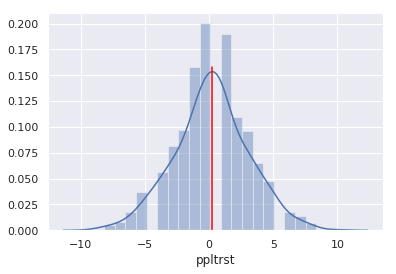

(Approach 1) Count of no less trusting (0) vs. less trusting (1):
0    560
1    346
Name: less_trusting, dtype: int64
(Approach 2) Mean of differences for SE: 0.1986754966887417

(Approach 1) People in SE did not become less trusting between the two survey years
(Approach 2) People in SE did not become less trusting between the two survey years



In [11]:
for country in countries:
    print("For country: {}".format(country))
# I used this line to spot-check that the groupby was in fact returning the difference in response for each idno:
#    response_df = df.loc[df['cntry'] == country,['idno','year','ppltrst']].sort_values(['idno','year'])
    fig = plt.figure()
    response_df = df.loc[df['cntry'] == country,['idno','year','ppltrst']].dropna(axis='rows').groupby(['idno']).diff().dropna(axis='rows')
    diff_mean = response_df['ppltrst'].mean()

    ax = sns.distplot(response_df['ppltrst'])
    plt.axvline(diff_mean,0,.75,color='red')
#    sns.boxplot(response_df['ppltrst'])
    plt.show()
    response_df['less_trusting'] = response_df['ppltrst'].apply(lambda x: 1 if x < 0 else 0)
    cntry_diff_df = response_df['less_trusting'].value_counts()
    print("(Approach 1) Count of no less trusting (0) vs. less trusting (1):")
    print(cntry_diff_df)
    print("(Approach 2) Mean of differences for {}: {}\n".format(country,diff_mean))

    cntry_diff = cntry_diff_df.loc[0] - cntry_diff_df.loc[1]

# Is the result positive, negative, or zero?
# The question is: did people become less trusting? Zero is the same level of trust, so it counts as "no".
    if cntry_diff >= 0:
        more_or_less = 'did not become'
    else:
        more_or_less = 'became'        
    print("(Approach 1) People in {} {} less trusting between the two survey years".format(country,more_or_less))
    
    if diff_mean < 0:
        less_or_not = 'became'
    else:
        less_or_not = 'did not become'
    print("(Approach 2) People in {} {} less trusting between the two survey years\n".format(country,less_or_not))
 

The countries where the two approaches don't agree are interesting! For Spain (ES), more people were no less trusting, so apparently those who became less trusting became _a lot less trusting_.

The difference in Norway (NO) isn't as pronounced as Spain, but it's just enough to make the two approaches disagree.

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

This is almost the same question as above, except we are seeing if responses improved rather than dropped.

I preferred Approach #2 above, so I'm just going to use it here.

For country: CH


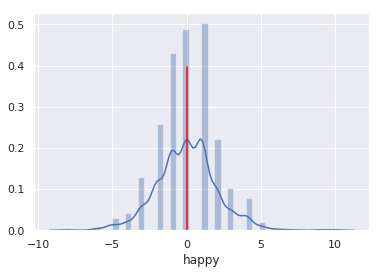

Mean of differences for CH: 0.023376623376623377
People in CH became happier between the two survey years

For country: CZ


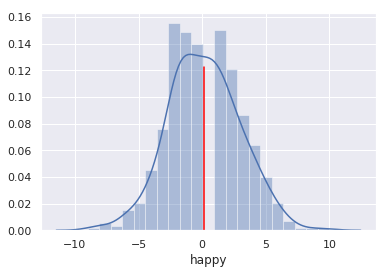

Mean of differences for CZ: 0.1625
People in CZ became happier between the two survey years

For country: DE


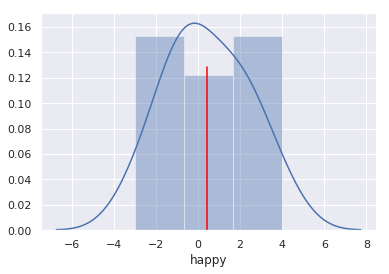

Mean of differences for DE: 0.42857142857142855
People in DE became happier between the two survey years

For country: ES


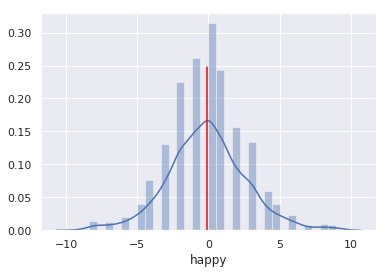

Mean of differences for ES: -0.12716763005780346
People in ES did not become happier between the two survey years

For country: NO


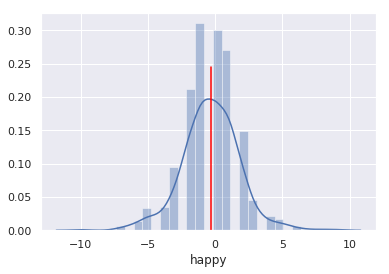

Mean of differences for NO: -0.33975240715268223
People in NO did not become happier between the two survey years

For country: SE


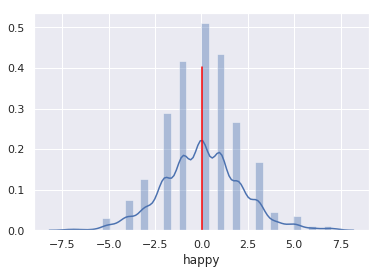

Mean of differences for SE: 0.03871681415929203
People in SE became happier between the two survey years



In [12]:
for country in countries:
    print("For country: {}".format(country))
    response_df = df.loc[df['cntry'] == country,['idno','year','happy']].dropna(axis='rows').groupby(['idno']).diff().dropna(axis='rows')
    diff_mean = response_df['happy'].mean()

    fig = plt.figure()
    ax = sns.distplot(response_df['happy'])
    plt.axvline(diff_mean,0,.75,color='red')
    plt.show()
    
# FLIP THIS compared to what we do for "less trusting" people above--1 for positive differences, 0 for <= 0.
    response_df['happier'] = response_df['happy'].apply(lambda x: 1 if x > 0 else 0)
    print("Mean of differences for {}: {}".format(country,diff_mean))

    if diff_mean > 0:
        less_or_not = 'became'
    else:
        less_or_not = 'did not become'
    print("People in {} {} happier between the two survey years\n".format(country,less_or_not))
 

## 3. Who reported watching more TV in 2012, men or women?

This is a single year, we're not aggregating results by country, and while the numeric responses for tvtot are categorical, they are also ordinal, with higher values representing more TV watched.

The sample sizes for men and women are not equal, but they're reasonably close...?

Let's look at the distributions for each group, and use statistics to help us decide the answer to the question.

In [13]:
tv_df = df.loc[(df['year'] == 6),['gndr','tvtot']].dropna(axis='rows')

If we were to look at these stats, it looks like women watch slightly more...but we can also try some of the distribution comparison tests to confirm.

In [14]:
tv_df.groupby('gndr').describe(include='all')

tvtot                                             
       count      mean       std  min  25%  50%  75%  max
gndr                                                     
1.0   2151.0  3.901906  1.983690  0.0  2.0  4.0  5.0  7.0
2.0   2140.0  3.944393  2.049457  0.0  2.0  4.0  6.0  7.0

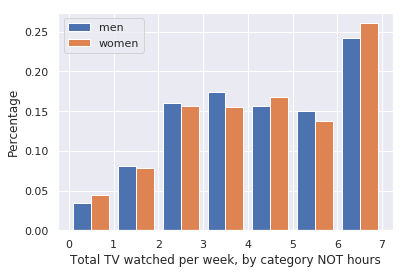

In [15]:
men = tv_df.loc[tv_df['gndr'] == 1,'tvtot']
women = tv_df.loc[tv_df['gndr'] == 2,'tvtot']

fig = plt.figure()
plt.hist([men,women],bins=7,density=True)
labels=['men','women']
plt.xlabel('Total TV watched per week, by category NOT hours')
plt.ylabel('Percentage')
plt.legend(labels=labels)

The distributions of TV time for men and women seem kind of normal (despite the spike for category 7). We can use the Shapiro-Wilk test to confirm:

In [16]:
stats.shapiro(men)

(0.9434293508529663, 5.994494507539187e-28)

In [17]:
stats.shapiro(women)

(0.9390434622764587, 8.488309331265169e-29)

The W statistic is close to 1 for both, and the p-value is super tiny--so it turns out these are in fact close to normal. Nice. 

That means we can run either a t-test or a one-way ANOVA test:

In [18]:
print(stats.ttest_ind(men,women))

Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.4902360402696986)


In [19]:
F, p = stats.f_oneway(men, women)

In [20]:
print(F,p)

0.4760900791225934 0.49023604027095813


These p-values suggest that these two groups do not differ significantly.

So, given that the distributions for TV watching for men and for women are close to normal, and do not differ significantly in population, I think comparing the means is probably a fair way to assess which gender watches more TV. Women it is.

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

This feels similar to the question above. Same approach--look at the distributions of responses and use statistical measures to decide the answer.

In [21]:
foreveralone_df = df.loc[(df['year'] == 6) & (df['partner'] == 1),'pplfair'].dropna(axis='rows')
partnered_df = df.loc[(df['year'] == 6) & (df['partner'] == 2),'pplfair'].dropna(axis='rows')

In [22]:
foreveralone_df.describe()

count    2663.000000
mean        6.080736
std         2.116945
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: pplfair, dtype: float64

In [23]:
partnered_df.describe()

count    1608.000000
mean        5.856965
std         2.162229
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: pplfair, dtype: float64

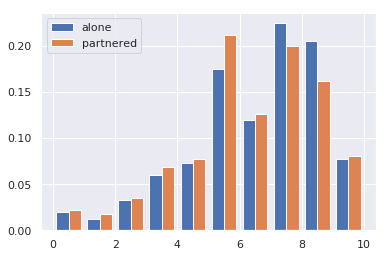

In [24]:
fig = plt.figure()
ax = plt.hist([foreveralone_df,partnered_df],density=True)
labels=['alone','partnered']
plt.legend(labels=labels)

In [25]:
stats.shapiro(foreveralone_df)

(0.9410251975059509, 2.4778057341886867e-31)

In [26]:
stats.shapiro(partnered_df)

(0.9561690092086792, 1.4302870646482291e-21)

In [27]:
print(stats.ttest_ind(foreveralone_df,partnered_df))

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609883756)


In [28]:
F, p = stats.f_oneway(foreveralone_df, partnered_df)

In [29]:
print(F,p)

11.023086567011378 0.0009073952609876207


In [30]:
foreveralone_df.describe()

count    2663.000000
mean        6.080736
std         2.116945
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: pplfair, dtype: float64

In [31]:
partnered_df.describe()

count    1608.000000
mean        5.856965
std         2.162229
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: pplfair, dtype: float64

The distribution of the two samples (of people who live alone, and partnered people) are relatively normal.

The two populations are not the same size--just over 1,000 more people living alone responded to the survey question than partnered people in 2012.

The t-test and ANOVA test indicate the distributions differ significantly.

The means and standard deviations are close, and seem to indicate that people who live alone tend to see people as being more fair.

## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Choose some countries. Plot distributions for this variable for each chosen country, see what pops out.

In [91]:
social_df = df.loc[(df['year'] == 7)]

In [92]:
social_df[['cntry','sclmeet']].dropna(axis='rows').groupby('cntry').describe()

sclmeet                                             
        count      mean       std  min  25%  50%  75%  max
cntry                                                     
CH      772.0  5.160622  1.308499  1.0  4.0  6.0  6.0  7.0
CZ      655.0  4.445802  1.481706  1.0  4.0  4.0  6.0  7.0
DE       14.0  4.428571  0.755929  3.0  4.0  4.0  5.0  6.0
ES     1211.0  5.260116  1.467855  1.0  4.0  6.0  6.0  7.0
NO      731.0  5.302326  1.347848  1.0  4.0  6.0  6.0  7.0
SE      908.0  5.426211  1.373098  2.0  4.0  6.0  7.0  7.0

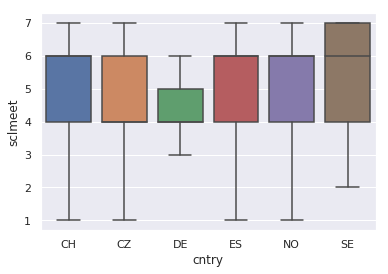

In [93]:
sns.boxplot(x='cntry',y='sclmeet',data=social_df)

Right away I see the means for everyone but Switzerland (CH) and the Czech Republic (CZ) are over 5, while those two countries are stuck in the mid-4s, meaning respondents socialize several times a month, but less than once a week (on average).

I also see Germany (DE) only has 14 respondents, while the other countries have several hundred. I'm not going to look any further at Germany's results.

Norway and Sweden are next door neighbors and have similar-looking stats. I feel like looking at countries with a little more of a geographic spread might be interesting, since I'm obliged to choose 3-4. (Comparing neighbors could be an interesting research project of its own.)

In [111]:
my_four_countries = ['CH','CZ','ES','NO']
social_df = social_df.loc[social_df['cntry'].isin(my_four_countries)].dropna(axis='rows')

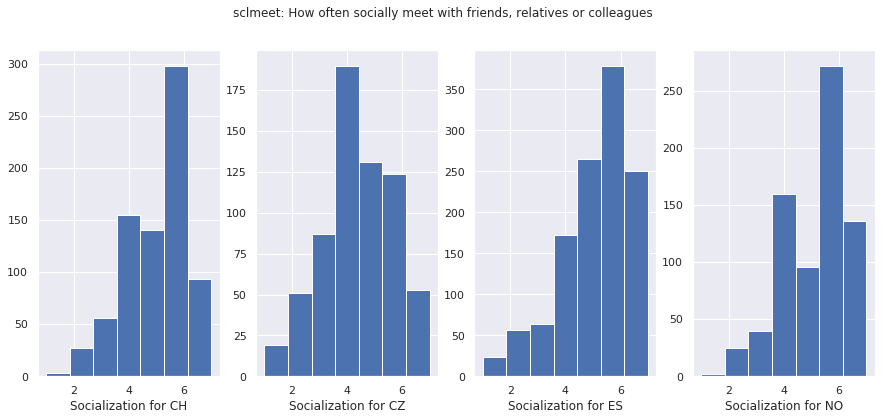

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(15,6))
fig.suptitle("sclmeet: How often socially meet with friends, relatives or colleagues")
for ax, country in zip(axes.flatten(), my_four_countries):
    ax.hist(social_df.loc[social_df['cntry'] == country,'sclmeet'],
            bins=7)
    ax.set_xlabel("Socialization for {}".format(country))
plt.show()

In [116]:
socializing = np.asarray(social_df.loc[social_df['cntry'] == 'CH','sclmeet'].tolist() + 
                       social_df.loc[social_df['cntry'] == 'CZ','sclmeet'].tolist() + 
                       social_df.loc[social_df['cntry'] == 'ES','sclmeet'].tolist() + 
                       social_df.loc[social_df['cntry'] == 'NO','sclmeet'].tolist())

In [117]:
countries = np.repeat(my_four_countries,888)

In [115]:
arr_lens = {}
for country in my_four_countries:
    arr_lens[country] = social_df.loc[social_df['cntry'] == 'SE','sclmeet'].shape[0]
arr_lens

{'CH': 0, 'CZ': 0, 'ES': 0, 'NO': 0}

In [118]:
tukey = pairwise_tukeyhsd(endog=socializing,      # Data
                          groups=countries,   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  

ValueError: data has 3195 elements and groups has 3552

In [112]:
social_df.loc[social_df['sclmeet'].isnull()]

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner


In [113]:
social_df['sclmeet'].unique()

array([6., 5., 7., 4., 3., 2., 1.])

In [114]:
# Why weren't we shown MultiComparison?
mc = MultiComparison(social_df['cntry'], social_df['sclmeet'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?